Keras API   
https://www.youtube.com/playlist?list=PLZbbT5o_s2xrwRnXk_yCPtnqqo4_u2YGL

In [1]:
# Data prepration
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [2]:
train_labels = []
train_samples = []

In [3]:
for i in range(50):
  random_younger = randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(1)

  random_older = randint(65,100)
  train_samples.append(random_older)
  train_labels.append(0)

for i in range(1000):
  random_younger = randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(0)

  random_older = randint(65,100)
  train_samples.append(random_older)
  train_labels.append(1)

In [4]:
train_samples = np.array(train_samples)
train_labels = np.array(train_labels)
train_labels, train_samples = shuffle(train_labels,train_samples)

In [5]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [6]:
print(scaled_train_samples)

[[0.93103448]
 [0.90804598]
 [0.62068966]
 ...
 [0.71264368]
 [0.7816092 ]
 [0.13793103]]


In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [8]:
model = Sequential([
 Dense(units=16,input_shape=(1,),activation='relu'),
 Dense(units=32,activation='relu'), # fully connected layer
 Dense(units=2,activation='softmax') # will give us probability for each output class
])

In [9]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.fit(x=scaled_train_samples,y=train_labels, validation_split=0.1,batch_size=10,epochs=30,shuffle=True,verbose=2)

Epoch 1/30
189/189 - 0s - loss: 0.6661 - accuracy: 0.5476 - val_loss: 0.6409 - val_accuracy: 0.6286
Epoch 2/30
189/189 - 0s - loss: 0.6362 - accuracy: 0.6265 - val_loss: 0.6050 - val_accuracy: 0.7095
Epoch 3/30
189/189 - 0s - loss: 0.6072 - accuracy: 0.6873 - val_loss: 0.5734 - val_accuracy: 0.7429
Epoch 4/30
189/189 - 0s - loss: 0.5791 - accuracy: 0.7222 - val_loss: 0.5442 - val_accuracy: 0.7714
Epoch 5/30
189/189 - 0s - loss: 0.5508 - accuracy: 0.7566 - val_loss: 0.5149 - val_accuracy: 0.8190
Epoch 6/30
189/189 - 0s - loss: 0.5223 - accuracy: 0.7884 - val_loss: 0.4869 - val_accuracy: 0.8429
Epoch 7/30
189/189 - 0s - loss: 0.4942 - accuracy: 0.8180 - val_loss: 0.4599 - val_accuracy: 0.8762
Epoch 8/30
189/189 - 0s - loss: 0.4669 - accuracy: 0.8434 - val_loss: 0.4346 - val_accuracy: 0.8810
Epoch 9/30
189/189 - 0s - loss: 0.4407 - accuracy: 0.8651 - val_loss: 0.4110 - val_accuracy: 0.8905
Epoch 10/30
189/189 - 0s - loss: 0.4161 - accuracy: 0.8741 - val_loss: 0.3893 - val_accuracy: 0.9048

In [12]:
# Preprocess test data

In [13]:
test_labels = []
test_samples = []

In [14]:
for i in range(10):
  random_younger = randint(13,64)
  test_samples.append(random_younger)
  test_labels.append(1)

  random_older = randint(65,100)
  test_samples.append(random_older)
  test_labels.append(0)

for i in range(200):
  random_younger = randint(13,64)
  test_samples.append(random_younger)
  test_labels.append(0)

  random_older = randint(65,100)
  test_samples.append(random_older)
  test_labels.append(1)


In [15]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

In [16]:
scaler = MinMaxScaler(feature_range=(0,1))
sclaed_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

In [17]:
predictions = model.predict(x=sclaed_test_samples, batch_size=10, verbose=0)

In [19]:
print(predictions)

[[0.952826   0.04717391]
 [0.11107683 0.88892317]
 [0.9387378  0.0612622 ]
 [0.9532942  0.04670578]
 [0.95009166 0.04990835]
 [0.1565407  0.84345925]
 [0.95037174 0.04962828]
 [0.94916034 0.0508396 ]
 [0.01810955 0.98189044]
 [0.09870884 0.9012912 ]
 [0.23926061 0.7607394 ]
 [0.01413101 0.98586893]
 [0.90628076 0.09371924]
 [0.9536424  0.04635761]
 [0.94916034 0.0508396 ]
 [0.8337465  0.16625348]
 [0.95255923 0.04744083]
 [0.8816355  0.11836454]
 [0.60483116 0.3951689 ]
 [0.02963215 0.97036785]
 [0.01810955 0.98189044]
 [0.60483116 0.3951689 ]
 [0.31839782 0.6816022 ]
 [0.9424936  0.05750635]
 [0.47456646 0.52543354]
 [0.00972465 0.9902754 ]
 [0.9536183  0.04638174]
 [0.95255923 0.04744083]
 [0.949527   0.05047296]
 [0.40961647 0.59038347]
 [0.26407915 0.7359208 ]
 [0.9529447  0.04705539]
 [0.01413101 0.98586893]
 [0.9453936  0.05460639]
 [0.8146559  0.18534414]
 [0.9525275  0.04747247]
 [0.952826   0.04717391]
 [0.74743116 0.2525689 ]
 [0.95065033 0.04934971]
 [0.9476978  0.05230211]


In [20]:
rounded_predictions = np.argmax(predictions, axis=1)

In [21]:
print(rounded_predictions)

[0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0 0
 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0
 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 1 0 1 0
 1 0 1 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1 0 1 0 0 1 1 0 0
 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0
 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 0 1
 0 1 1 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1
 1 1 1 1 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1
 0 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 0 1 1 1 1 1 1 1 0 1 0 0 1 0
 1 1 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1
 1 0 1 1 1 0 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1
 1 1 1 0 1 1 1 1 1 0 0 1 1]


In [22]:
# Confusion Matrix

In [23]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [24]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [25]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[192  18]
 [  9 201]]


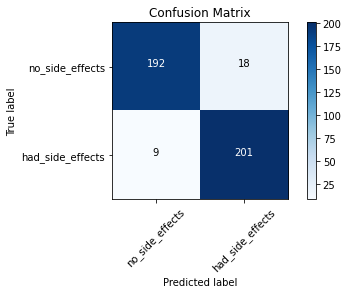

In [26]:
cm_plot_labels = ['no_side_effects', 'had_side_effects']
plot_confusion_matrix(cm=cm,classes=cm_plot_labels, title='Confusion Matrix')

Saving the model

1. Model.save()

In [28]:
# import os.path
# if os.path.isfile('models/medical_trial_model.h5') is False:
#   model.save('models/medical_trial_model.h5')

In [31]:
# load the model
# from tensorflow.keras.models import load_model
# new_model = load_model('models/medical_trial_model.h5')

2. model.to_json()  

    Useful when only architecture of the model is to be saved and not its     weights or its training configuration, i.e. save architecture only

In [32]:
# save as json
json_string = model.to_json()
# save as yaml
yaml_string = model.to_yaml()

In [33]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_r

In [34]:
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)

In [35]:
model_architecture.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


model.save_weights()

Only saves weights of the model not the architecture

In [36]:
# import os.path
# if os.path.isfile('models/medical_trial_model.h5') is False:
#   model.save_weights('models/medical_trial_model.h5')

In [38]:
# load the model

# first generate the architecture of the model
model2 = Sequential([
 Dense(units=16, input_shape=(1,), activation='relu'),
 Dense(units=32, activation='relu'),
 Dense(2, activation='softmax')
])

In [1]:
# model2.load_weights('models/medical_trial_model.h5')
# model2.get_weights()